<img width="200" style="float:right" src="https://github.com/danielscarvalho/Insper-DS-Dicas/blob/master/Insper-Logo.png?raw=true">

# Computação para Ciências dos Dados

<sub><a href="https://www.insper.edu.br/pos-graduacao/programas-avancados/programa-avancado-em-data-science-e-decisao/">PÓS-GRADUAÇÃO EM DATA SCIENCE E DECISÃO</a></sub>

## Dica do Dia: 003

O objetivo desta dica do dia é explorar mais sobre WEB Scraping e como obter dados estruturados (tabular) de páginas na Internet, com a tag HTML &lt;TABLE&gt;&lt;/TABLE&gt;

> Todos os dias no período de contingência pelo Coronavirus (COVID-19) vamos enviar uma breve dica sobre Python para ciências dos dados em um jupyter notebook, conteúdo adicional ao curso que pode ser utilizado nos projetos

### WEB Scraping dados estruturados (tabular)

Temos disponível na WEB petabytes em dados texto de páginas a maior parte em HTML. Podemos obter informações de empresas e instituições quando não há API disponível. Vamos garimpar estas informações com WEB Scraping.

Importar as bibliotecas.<BR>
Usamos BeautifulSoup para fazer o parser das páginas HTML

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

Vamos garimpar os dados financeiros estruturados tabulares no site do Yahoo. Como este site exige um protocolo seguro (HTTP**S**), precisaríamos de um certificado de segurança para acessá-lo. Para pular esta etapa, passamos o argumento `verify=False`.

In [7]:
response=requests.get(r"https://finance.yahoo.com/quote/%5EGSPC/history/", verify=False)

C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [8]:
response.text[:1000]

'<!DOCTYPE html><html id="atomic" class="NoJs featurephone" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark(\'PageStart\');</script><meta charset="utf-8"/><title>S&amp;P 500 (^GSPC) Historical Data - Yahoo Finance</title><meta name="keywords" content="^GSPC, S&amp;P 500, ^GSPC historical prices, S&amp;P 500 historical prices, historical prices, stocks, quotes, finance"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="90376669494"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-US" content="Get historical data for the S&amp;P 500 (^GSPC) on Yahoo Finance. View and download daily, weekly or monthly data to help your investment decisions."/><meta name="oath:guce:consent-host" content="guce.yahoo.com"/><meta name="msvalidate

As inforações são recebidas em formato texto, conforme o característica do protocolo HTTP<br>
Passamos o texto original para o BS realizar o parser

In [9]:
soup = BeautifulSoup(response.content, 'html.parser')

Na estrutura do [DOM](https://en.wikipedia.org/wiki/Document_Object_Model) (Document Object Model) do HTML, vamos separar a tag TABLE:

In [10]:
table = soup.find(name='table')

In [11]:
table

<table class="W(100%) M(0)" data-reactid="31" data-test="historical-prices"><thead data-reactid="32"><tr class="C($tertiaryColor) Fz(xs) Ta(end)" data-reactid="33"><th class="Ta(start) W(100px) Fw(400) Py(6px)" data-reactid="34"><span data-reactid="35">Date</span></th><th class="Fw(400) Py(6px)" data-reactid="36"><span data-reactid="37">Open</span></th><th class="Fw(400) Py(6px)" data-reactid="38"><span data-reactid="39">High</span></th><th class="Fw(400) Py(6px)" data-reactid="40"><span data-reactid="41">Low</span></th><th class="Fw(400) Py(6px)" data-reactid="42"><span data-reactid="43">Close*</span></th><th class="Fw(400) Py(6px)" data-reactid="44"><span data-reactid="45">Adj Close**</span></th><th class="Fw(400) Py(6px)" data-reactid="46"><span data-reactid="47">Volume</span></th></tr></thead><tbody data-reactid="48"><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="49"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="50"><span data-reactid="51">Mar 18

Converter novamente para texto (string)

In [13]:
table_str = str(table)

Carregar os dados no dataframe Pandas, utilizando seu próprio parser HTML

In [88]:
df_sp500 = pd.read_html(table_str)[0]

In [89]:
df_sp500.sample(10)

,Date,Open,High,Low,Close*,Adj Close**,Volume
8,"Mar 06, 2020",2954.20,2985.93,2901.54,2972.37,2972.37,6552140000
52,"Jan 02, 2020",3244.67,3258.14,3235.53,3257.85,3257.85,3458250000
55,"Dec 27, 2019",3247.23,3247.93,3234.37,3240.02,3240.02,2428670000
73,"Dec 02, 2019",3143.85,3144.31,3110.78,3113.87,3113.87,3268740000
15,"Feb 26, 2020",3139.90,3182.51,3108.99,3116.39,3116.39,5478110000
57,"Dec 24, 2019",3225.45,3226.43,3220.51,3223.38,3223.38,1296540000
3,"Mar 13, 2020",2569.99,2711.33,2492.37,2711.02,2711.02,8258670000
76,"Nov 26, 2019",3134.85,3142.69,3131.00,3140.52,3140.52,4595590000
91,"Nov 05, 2019",3080.80,3083.95,3072.15,3074.62,3074.62,4486130000
7,"Mar 09, 2020",2863.89,2863.89,2734.43,2746.56,2746.56,8423050000


Todos os campos do dataframe Pandas estão em formato texto (string)

In [90]:
df_sp500["Open"][1]

'2425.66'

Precisamos apagar as linhas que não são interessante e não vão ser convertidas para tipos numéricos (int ou float)

In [91]:
df_sp500.drop(df_sp500.index[-1], inplace=True)

Podemos fazer a conversão completa do dataframe para numérico quando for possível, e manter texto (string) onde for adequado

In [95]:
df_sp500 = df_sp500.apply(pd.to_numeric, errors='ignore')

In [96]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
Date           100 non-null object
Open           100 non-null float64
High           100 non-null float64
Low            100 non-null float64
Close*         100 non-null float64
Adj Close**    100 non-null float64
Volume         100 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 6.2+ KB


Podemos também converter apenas uma coluna do dataframe Pandas

In [97]:
df_sp500['Open'] = df_sp500['Open'].astype(float)

In [98]:
df_sp500["Open"][1]

2425.66

Uma vez as colunas numéricas convertidas, podemos realizar operações aritméticas, geração de gráficos e por fim a análise de dados

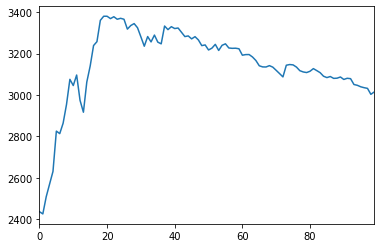

In [99]:
df_sp500["Open"].plot()

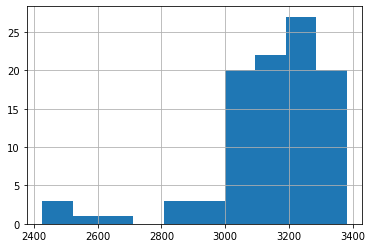

In [100]:
df_sp500["Open"].hist()

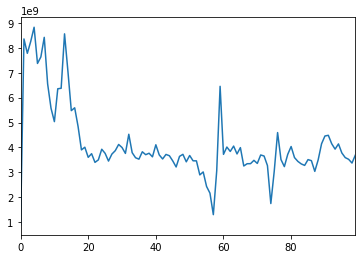

In [101]:
df_sp500['Volume'].plot()

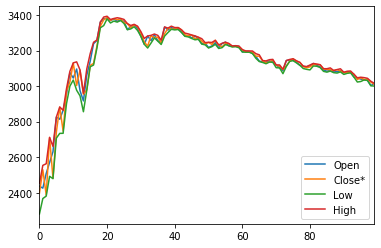

In [102]:
df_sp500[['Open','Close*','Low','High']].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BBA6908>,
      dtype=object)

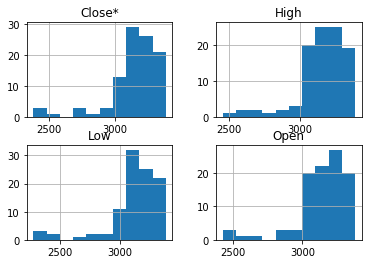

In [86]:
df_sp500[['Open','Close*','Low','High']].hist()

__Atividade:__ Encontrar uma página WEB com dados estruturados (tabulares) relevantes para a sua área de atuação profissional ou formação. Carregar os dados em um dataframe Pandas e gerar gráficos para analisar visualmente as informações

Para saber mais:

- https://www.crummy.com/software/BeautifulSoup/bs4/doc/#quick-start
- https://pandas.pydata.org/docs/
- https://www.w3schools.com/html/default.asp
- https://medium.com/data-hackers/como-fazer-web-scraping-em-python-23c9d465a37f
- https://www.geeksforgeeks.org/dealing-with-rows-and-columns-in-pandas-dataframe/